# Overview: Game Maps and Players (Interactions)

In [1]:
# Pandas
import numpy as np
import pandas as pd
# Plot
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-whitegrid')
%matplotlib inline

Read data

In [2]:
dataset_folder = '../input'
plot_folder = '../plot'

courses = pd.read_csv('%s/%s' % (dataset_folder, 'courses.csv'), sep='\t', encoding='utf-8')
likes   = pd.read_csv('%s/%s' % (dataset_folder, 'likes.csv'), sep='\t', encoding='utf-8')
plays   = pd.read_csv('%s/%s' % (dataset_folder, 'plays.csv'), sep='\t', encoding='utf-8')
clears  = pd.read_csv('%s/%s' % (dataset_folder, 'clears.csv'), sep='\t', encoding='utf-8')
records = pd.read_csv('%s/%s' % (dataset_folder, 'records.csv'), sep='\t', encoding='utf-8')

Create a `dict` to store the interactions.

In [3]:
ids = courses['id'].unique().tolist()
interactions = {id:{'likes':0, 'plays':0, 'clears':0, 'records':0} for id in ids}

## Overview

In [4]:
names = ['courses','likes','plays','clears','records']
for df, name in zip([courses,likes,plays,clears,records], names):
    print('%s:' % (name), len(df))

courses: 115032
likes: 618687
plays: 3941378
clears: 2051809
records: 117126


### Likes

In [5]:
likes.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
1,2018-03-02 09:46:27.847,0000-0000-035A-9F14,jlan6e
2,2017-12-18 14:47:47.489,0001-0000-0347-486A,cat38690
3,2017-12-18 14:47:47.489,0001-0000-0347-486A,raulcaba
4,2017-12-18 14:47:48.878,0001-0000-0359-B3CD,Tugaeddy


In [6]:
# count number of likes per map
likes_per_course = likes['id'].value_counts().to_dict()

In [7]:
for id, values in likes_per_course.items():
    interactions[id]['likes'] = values

### Plays

In [8]:
plays.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,darter60k
1,2018-02-23 15:22:44.015,0000-0000-0353-3D35,davidchofis
2,2018-02-23 15:22:44.015,0000-0000-0353-3D35,fabioviana
3,2018-02-23 15:22:44.015,0000-0000-0353-3D35,gorigokky
4,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell


In [9]:
# count number of plays per map
plays_per_course = plays['id'].value_counts().to_dict()

In [10]:
for id, values in plays_per_course.items():
    interactions[id]['plays'] = values

### Clears

In [11]:
clears.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,darter60k
1,2018-02-23 15:22:44.015,0000-0000-0353-3D35,davidchofis
2,2018-02-23 15:22:44.015,0000-0000-0353-3D35,fabioviana
3,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
4,2018-02-23 15:22:44.015,0000-0000-0353-3D35,igatake0229


In [12]:
# count number of clears per map
clears_per_course = clears['id'].value_counts().to_dict()

In [13]:
for id, values in clears_per_course.items():
    interactions[id]['clears'] = values

### Records

In [14]:
records.head()

,catch,id,player,timeRecord
0,2017-12-18 15:35:29.015,F68A-0000-0337-AF4F,The_Brucican,15482
1,2018-03-02 10:09:32.392,9669-0000-0330-554C,inoino2226,9265
2,2017-12-18 15:47:40.665,0D1D-0000-0355-DA7A,hbeeboy,6692
3,2018-02-23 15:02:20.557,18E3-0000-032A-27AB,Khazey,40383
4,2018-02-23 15:05:16.414,2C55-0000-0300-854A,okayan3378,1533


In [15]:
# count number of records per map
records_per_course = records['id'].value_counts().to_dict()

In [16]:
for id, values in records_per_course.items():
    interactions[id]['records'] = values

### Plot

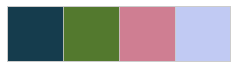

In [17]:
# palette of colors
palette = sns.color_palette('cubehelix', 4)
sns.palplot(palette)

In [18]:
# data sorted
df = pd.DataFrame(interactions).transpose()
df['sum'] = df['likes'] + df['plays'] + df['clears'] + df['records']
df = df.sort_values(by=['sum'], ascending=False)

In [19]:
df.head()

,clears,likes,plays,records,sum
5AB9-0000-038F-A23E,1475,316,1673,2,3466
DE4D-0000-035D-3AE1,612,462,1089,1,2164
8F40-0000-0391-4B50,851,185,1014,1,2051
CE94-0000-038F-7559,737,193,997,1,1928
BAC8-0000-036A-7EE1,622,322,937,1,1882


In [20]:
# settings
limit = 100
fontsize = 14

# getting axis
axis_id = df.index.tolist()[0:limit]
axis_plays = df['plays'].tolist()[0:limit]
axis_clears = df['clears'].tolist()[0:limit]
axis_records = df['records'].tolist()[0:limit]
axis_likes = df['likes'].tolist()[0:limit]

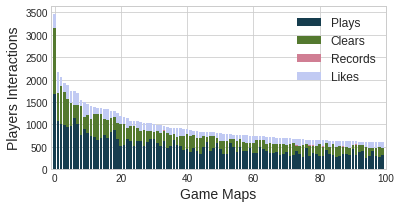

In [21]:
# plot
fig, ax = plt.subplots()
bottom_records  = [axis_plays[i] + axis_clears[i] for i in range(0, limit)]
bottom_likes    = [bottom_records[i] + axis_records[i] for i in range(0, limit)]

# bar plot
p1 = plt.bar(range(0, limit), axis_plays, color=palette[0], label='Plays')
p2 = plt.bar(range(0, limit), axis_clears, bottom=axis_plays, color=palette[1], label='Clears')
p3 = plt.bar(range(0, limit), axis_records, bottom=bottom_records, color=palette[2], label='Records')
p4 = plt.bar(range(0, limit), axis_likes, bottom=bottom_likes, color=palette[3], label='Likes')

# texts and labels
plt.ylabel('Players Interactions', fontsize=fontsize)
plt.xlabel('Game Maps', fontsize=fontsize)
ax.legend(prop={'size':fontsize-2})

# ticks
fig.set_size_inches(6, 3, forward=True)
plt.xlim(-1, 100)
# plt.savefig('%s/%s.pdf' % (plot_folder, 'interactions'), dpi=300)
plt.show()

## Power law test  (Clauset et al. 2009)

https://arxiv.org/pdf/0706.1062.pdf

In [22]:
import powerlaw
from scipy import stats
# -- ignore warning
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [23]:
data = df['sum']
fit = powerlaw.Fit(data, discrete=True, estimate_discrete=False)

Calculating best minimal value for power law fit


Plot

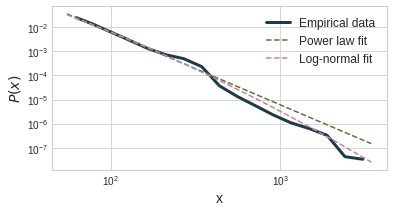

In [24]:
# plot
fig, ax = plt.subplots()
fig_powerlaw = fit.plot_pdf(linewidth=3, color=palette[0], label='Empirical data')
fit.power_law.plot_pdf(ax=fig_powerlaw, color=palette[1], linestyle='--', label='Power law fit')
fit.lognormal.plot_pdf(ax=fig_powerlaw, color=palette[2], linestyle='--', label='Log-normal fit')

# texts and labels
plt.ylabel('$P(x)$', fontsize=fontsize)
plt.xlabel('x', fontsize=fontsize)
ax.legend(prop={'size':fontsize-2})

# ticks
fig.set_size_inches(6, 3, forward=True)
plt.savefig('%s/%s.pdf' % (plot_folder, 'interactions-powerlaw-PDF'), dpi=300)
plt.show()

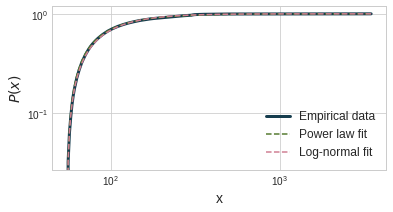

In [25]:
# plot
fig, ax = plt.subplots()
fig_powerlaw = fit.plot_cdf(linewidth=3, color=palette[0], label='Empirical data')
fit.power_law.plot_cdf(ax=fig_powerlaw, color=palette[1], linestyle='--', label='Power law fit')
fit.lognormal.plot_cdf(ax=fig_powerlaw, color=palette[2], linestyle='--', label='Log-normal fit')

# texts and labels
plt.ylabel('$P(x)$', fontsize=fontsize)
plt.xlabel('x', fontsize=fontsize)
ax.legend(prop={'size':fontsize-2})

# ticks
fig.set_size_inches(6, 3, forward=True)
plt.savefig('%s/%s.pdf' % (plot_folder, 'interactions-powerlaw-CDF'), dpi=300)
plt.show()

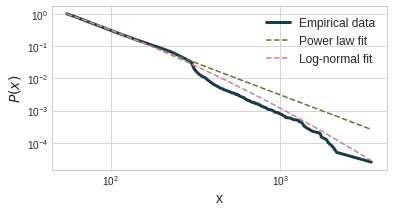

In [26]:
# plot
fig, ax = plt.subplots()
fig_powerlaw = fit.plot_ccdf(linewidth=3, color=palette[0], label='Empirical data')
fit.power_law.plot_ccdf(ax=fig_powerlaw, color=palette[1], linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig_powerlaw, color=palette[2], linestyle='--', label='Log-normal fit')

# texts and labels
plt.ylabel('$P(x)$', fontsize=fontsize)
plt.xlabel('x', fontsize=fontsize)
ax.legend(prop={'size':fontsize-2})

# ticks
fig.set_size_inches(6, 3, forward=True)
plt.savefig('%s/%s.pdf' % (plot_folder, 'interactions-powerlaw-CCDF'), dpi=300)
plt.show()

## Kolmogorov-smirnov (test)

Testing with many distributions.  

-   `D`: Close to 0 (better), drawn from the same distribution.
-   `p`: significance level, high is better.

In [27]:
cdfs = [
    "norm",            #Normal (Gaussian)
    "alpha",           #Alpha
    "anglit",          #Anglit
    "arcsine",         #Arcsine
    "beta",            #Beta
    "betaprime",       #Beta Prime
    "bradford",        #Bradford
    "burr",            #Burr
    "cauchy",          #Cauchy
    "chi",             #Chi
    "chi2",            #Chi-squared
    "cosine",          #Cosine
    "dgamma",          #Double Gamma
    "dweibull",        #Double Weibull
    "erlang",          #Erlang
    "expon",           #Exponential
    "exponweib",       #Exponentiated Weibull
    "exponpow",        #Exponential Power
    "fatiguelife",     #Fatigue Life (Birnbaum-Sanders)
    "foldcauchy",      #Folded Cauchy
    "f",               #F (Snecdor F)
    "fisk",            #Fisk
    "foldnorm",        #Folded Normal
    "gamma",           #Gamma
    
#     "gausshyper",      #Gauss Hypergeometric
    
    "genexpon",        #Generalized Exponential
    "genextreme",      #Generalized Extreme Value
    "gengamma",        #Generalized gamma
    "genlogistic",     #Generalized Logistic
    "genpareto",       #Generalized Pareto
    "genhalflogistic", #Generalized Half Logistic
    "gilbrat",         #Gilbrat
    "gompertz",        #Gompertz (Truncated Gumbel)
    "gumbel_l",        #Left Sided Gumbel, etc.
    "gumbel_r",        #Right Sided Gumbel
    "halfcauchy",      #Half Cauchy
    "halflogistic",    #Half Logistic
    "halfnorm",        #Half Normal
    "hypsecant",       #Hyperbolic Secant
    "invgamma",        #Inverse Gamma
    "invweibull",      #Inverse Weibull
    "johnsonsb",       #Johnson SB
    "johnsonsu",       #Johnson SU
    "laplace",         #Laplace
    "logistic",        #Logistic
    "loggamma",        #Log-Gamma
    "loglaplace",      #Log-Laplace (Log Double Exponential)
    "lognorm",         #Log-Normal
    "lomax",           #Lomax (Pareto of the second kind)
    "maxwell",         #Maxwell
    "mielke",          #Mielke's Beta-Kappa
    "nakagami",        #Nakagami
    
#     "ncx2",            #Non-central chi-squared
#     "ncf",             #Non-central F
#     "nct",             #Non-central Student's T
    
    "pareto",          #Pareto
    "powerlaw",        #Power-function
    "powerlognorm",    #Power log normal
    "powernorm",       #Power normal
    "rdist",           #R distribution
    "reciprocal",      #Reciprocal
    "rayleigh",        #Rayleigh
    "rice",            #Rice
    "recipinvgauss",   #Reciprocal Inverse Gaussian
    "semicircular",    #Semicircular
    "t",               #Student's T
    "triang",          #Triangular
    "truncexpon",      #Truncated Exponential
    "truncnorm",       #Truncated Normal
    
#     "tukeylambda",     #Tukey-Lambda
    
    "uniform",         #Uniform
    "vonmises",        #Von-Mises (Circular)
    "wald",            #Wald
    "weibull_min",     #Minimum Weibull (see Frechet)
    "weibull_max",     #Maximum Weibull (see Frechet)
    "wrapcauchy",      #Wrapped Cauchy
    
#     "ksone",           #Kolmogorov-Smirnov one-sided (no stats)
#     "kstwobign"        #Kolmogorov-Smirnov two-sided test for Large N
    ]

In [28]:
for cdf in cdfs:
    # fit our data set against every probability distribution
    parameters = eval("stats."+cdf+".fit(data)")
    # applying the Kolmogorov-Smirnof test
    D, p = stats.kstest(data, cdf, args=parameters)
    # print
    print('p = %.25f, D = %.6f (%s)' % (p,D,cdf))

p = 0.0000000000000000000000000, D = 0.225137 (norm)
p = 0.0000000000000000000000000, D = 0.019492 (alpha)
p = 0.0000000000000000000000000, D = 0.633033 (anglit)
p = 0.0000000000000000000000000, D = 0.823739 (arcsine)
p = 0.0000000000000000000000000, D = 0.104561 (beta)
p = 0.0000000000000000000000000, D = 0.027233 (betaprime)
p = 0.0000000000000000000000000, D = 0.874397 (bradford)
p = 0.0000000000000000001733231, D = 0.013812 (burr)
p = 0.0000000000000000000000000, D = 0.155465 (cauchy)
p = 0.0000000000000000000000000, D = 0.197631 (chi)
p = 0.0000000000000000000000000, D = 0.109354 (chi2)
p = 0.0000000000000000000000000, D = 0.568812 (cosine)
p = 0.0000000000000000000000000, D = 0.191810 (dgamma)
p = 0.0000000000000000000000000, D = 0.171159 (dweibull)
p = 0.0000000000000000000000000, D = 0.106528 (erlang)
p = 0.0000000000000000000000000, D = 0.176393 (expon)
p = 0.0000000000000000000000000, D = 0.023234 (exponweib)
p = 0.0000000000000000000000000, D = 0.239962 (exponpow)
p = 0.0000

/home/leonardo/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1618: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
/home/leonardo/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1618: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


p = 0.0000000000000000002387798, D = 0.013762 (mielke)
p = 0.0000000000000000000000000, D = 0.248535 (nakagami)
p = 0.0000000000000000000000000, D = 0.362934 (pareto)
p = 0.0000000000000000000000000, D = 0.459338 (powerlaw)
p = 0.0000000000000000000000000, D = 0.031286 (powerlognorm)
p = 0.0000000000000000000000000, D = 1.000000 (powernorm)
p = 0.0000000000000000000000000, D = 0.309285 (rdist)
p = 0.0000000000000000000000000, D = 1.000000 (reciprocal)
p = 0.0000000000000000000000000, D = 0.240535 (rayleigh)
p = 0.0000000000000000000000000, D = 0.238913 (rice)
p = 0.0000000000000000000000000, D = 0.081152 (recipinvgauss)
p = 0.0000000000000000000000000, D = 0.720544 (semicircular)
p = 0.0000000000000000000000000, D = 0.136888 (t)
p = 0.0000000000000000000000000, D = 0.749151 (triang)
p = 0.0000000000000000000000000, D = 0.755641 (truncexpon)
p = 0.0000000000000000000000000, D = 1.000000 (truncnorm)
p = 0.0000000000000000000000000, D = 0.916318 (uniform)
p = 0.0000000000000000000000000, 